![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/data_01.png)

## 本周摘要

- 项目四常见问题
- 统计学回归和拓展
- 彩蛋

- ` 讲师个人主页：` www.zhang-ran.com

> 开始录屏

`收集大家在项目四中遇到的疑问`


    * p_diffs 和实际 diffs 的差别计算
    * 基于P值计算对应的Z得分
    * 解释第一个P值的时候和解释回归总的P值的时候，把假设区分开
    * 在含有Z得分的地方，不止介绍了P值
    * 解释不同模型的时候没有说明为什么P的大小不一样
    * 为什么前面是单侧，回归模型是双侧
    * 回归模型传入的变量要交叉验证

 `其他常见问题`

### 基于零假设的数值模拟

导入下面的数据，并按照以下问题回答下面的测试题目。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

sample_data = full_data.sample(200)

`1.` 如果你想知道喝咖啡的人的平均身高是否与不喝咖啡的人的平均身高相等，那么，你的零假设和备择假设是什么？将它们放在下面的单元格中，并使用你的答案来回答下面的第一个测试题目。

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_0: \mu_{coff} - \mu_{no} \neq 0$$

`2.` 如果你想知道喝咖啡的人的平均身高是否低于不喝咖啡的人的身高，那么，你的零假设和备择假设是什么？将它们放在下面的单元格中，并使用你的答案来回答下面的第二个测试题目。

$$H_0: \mu_{coff} - \mu_{no} \geq 0$$


$$H_0: \mu_{coff} - \mu_{no} < 0$$

`3.` 对于10,000次迭代：自展程序会对样本数据进行抽样，计算喝咖啡的人和不喝咖啡的人的平均身高，并计算每个样本的平均差异。你要在迭代结束时获取三个数组 - 一个是每个平均值，一个是所有平均值的差异。使用你的抽样分布结果，回答下面的第三个测试题目。

In [4]:
nocoff_means, coff_means, diffs = [], [], []

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()

    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean - nocoff_mean) 

In [5]:
np.std(nocoff_means) # the standard deviation of the sampling distribution for nocoff

0.4051263127747525

In [6]:
np.std(coff_means) # the standard deviation of the sampling distribution for coff

0.24073763373472962

In [7]:
np.std(diffs) # the standard deviation for the sampling distribution for difference in means

0.4698091074387144

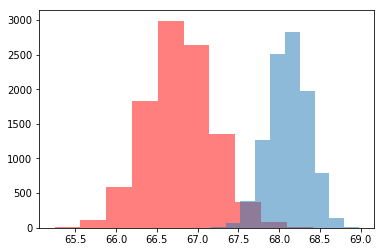

In [9]:
plt.hist(nocoff_means, alpha = 0.5, color = 'r');
plt.hist(coff_means, alpha = 0.5);

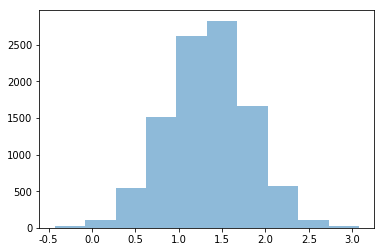

In [10]:
plt.hist(diffs, alpha = 0.5);

`4.` 现在，使用你观察到的平均值差异抽样分布以及 [该文档](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) 来模拟：如果零假设是真的，你会期望抽样分布是什么样的。你可以通过重新定位0位置分布来完成这个任务。另外，计算 在`sample_data`中观察到的样本均值差。用你的解决方案来回答下面测试题中的最后一个问题。

In [11]:
# Here are 10000 draws from the sampling distribution under the null

null_vals = np.random.normal(0, np.std(diffs), 10000)

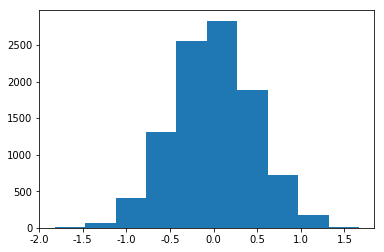

In [12]:
#Here is the sampling distribution of the difference under the null

plt.hist(null_vals);

In [14]:
obs = sample_data[sample_data['drinks_coffee'] == True]['height'].mean() - \
      sample_data[sample_data['drinks_coffee'] == False]['height'].mean()

In [15]:
(null_vals < obs).mean()

0.9986

> 关于AB测试
- `AB 测试就是为了验证在先验条件的存在的情况下，进行新的变更是否合理和可行以达到优化的目的。使用 AB 测试的方式能能够度量变更对某些指标的变化，是变更更具有合理性依据更充分`
- `不适用的场景：1）对没有明确参照的试验，AB 测试是基于先验条件的优化，如果没有一个参照对比是无法进行测试。2）数据获取时间长，AB 测试一般都是进行小规模快速的试验，所以对于数据获取的单周期较长的试验不太适用`
- `影响测试效果的因素：1）新奇效应：指老用户可能会觉得变化很新鲜，受变化吸引而偏爱新版本，哪怕从长远看来新版本并无益处。2）抗拒改变心理：老用户可能会因为纯粹不喜欢改变而偏爱旧版本，哪怕从长远来看新版本更好`

In [1]:
import scipy.stats as st
z = st.norm.ppf(1-0.05) # p值为0.05
z

1.6448536269514722

* 单侧检验  
    * https://baike.baidu.com/item/%E5%8D%95%E4%BE%A7%E6%A3%80%E9%AA%8C
* 双侧检验  
    * https://baike.baidu.com/item/%E5%8F%8C%E4%BE%A7%E6%A3%80%E9%AA%8C
* 单侧检验和双侧检验的区别  
    * http://book.51cto.com/art/201205/337283.htm

* 辛普森悖论（图示辛普森悖论）  
    * https://baike.baidu.com/item/%E8%BE%9B%E6%99%AE%E6%A3%AE%E6%82%96%E8%AE%BA/4475862?fr=aladdin

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E8%BE%9B%E6%99%AE%E6%A3%AE%E6%82%96%E8%AE%BA.png)

- 回归属于机器学习的监督学习

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E5%9B%9E%E5%BD%9201.png
)

- 一般x轴为自变量，y轴为因变量

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E5%9B%9E%E5%BD%9202.png
)

- 回归方程解释

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E5%9B%9E%E5%BD%9203.png
)

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E5%9B%9E%E5%BD%9204.png
)

- 最小二乘法拟合回归线

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E5%9B%9E%E5%BD%9205.png
)

- Python回归模型默认的零假设和P值

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E5%9B%9E%E5%BD%9206.png
)

- 相关性系数解释：相关性百分比

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E5%9B%9E%E5%BD%92007.png
)

- 多元线性回归举例

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E5%A4%9A%E5%85%83%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92-01.png
)

- 拟合多元线性回归

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E5%A4%9A%E5%85%83%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92-02.png
)

- 如果其他变量不变，只增加一个变量的一个数据

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E5%A4%9A%E5%85%83%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92-03.png
)

- 虚拟变量（机器学习知识初探）

* 由 m × n 个数aij排成的m行n列的数表称为m行n列的矩阵，简称m × n矩阵。
    * https://baike.baidu.com/item/%E7%9F%A9%E9%98%B5/18069?fr=aladdin

* 元素是实数的矩阵称为实矩阵，元素是复数的矩阵称为复矩阵。而行数与列数都等于n的矩阵称为n阶矩阵或n阶方阵。

* 实数，是有理数和无理数的总称。
    * https://baike.baidu.com/item/%E5%AE%9E%E6%95%B0
    
* 复数  https://baike.baidu.com/item/%E5%A4%8D%E6%95%B0/254365

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E5%A4%9A%E5%85%83%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92-04.png
)

* 满秩矩阵  
    * https://baike.baidu.com/item/%E6%BB%A1%E7%A7%A9%E7%9F%A9%E9%98%B5/10017113
    * 若矩阵秩等于行数，称为行满秩；若矩阵秩等于列数，称为列满秩。
    * 秩  
    * https://baike.baidu.com/item/%E7%9F%A9%E9%98%B5%E7%9A%84%E7%A7%A9/6285316?fr=aladdin

*  如果你要用 0 、1 编码来创建虚拟变量，你就得舍弃一个虚拟列，确保所得矩阵是满秩的（这样你从 python 里得到的解才会是可靠的。）

* 之所以要这么做，原因就在于线性代数的本质，更具体地说，要逆转矩阵，你手里的矩阵必须是满秩的 （也就是所有列都得线性独立），因此，你得舍弃掉一个虚拟列，方能得到线性独立的各列 （和一个满秩矩阵）

- [数据分析行业职业指南：Career In Data](https://udacity-1256668828.cos.ap-shanghai.myqcloud.com/career-in-data.pdf
)

> ## 彩蛋：
- 后续职业规划辅导（私信一对一）
- 课程优惠券